# Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets

from sklearn.multiclass import OneVsRestClassifier
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline


from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC, SVR

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load IRIS dataset

See the features and create X and y for model and preprocessing

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:4] 
y = iris["target"]
iris["feature_names"]
target_names = iris["target_names"]

iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### head of iris

In [4]:
data = pd.DataFrame(np.c_[X, y], columns=np.append(iris['feature_names'][2:4], ['target']))
data.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0


In [5]:
# split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [6]:
len(y_test)

30

# Training models and plot Decision boundary and Confusion matrix

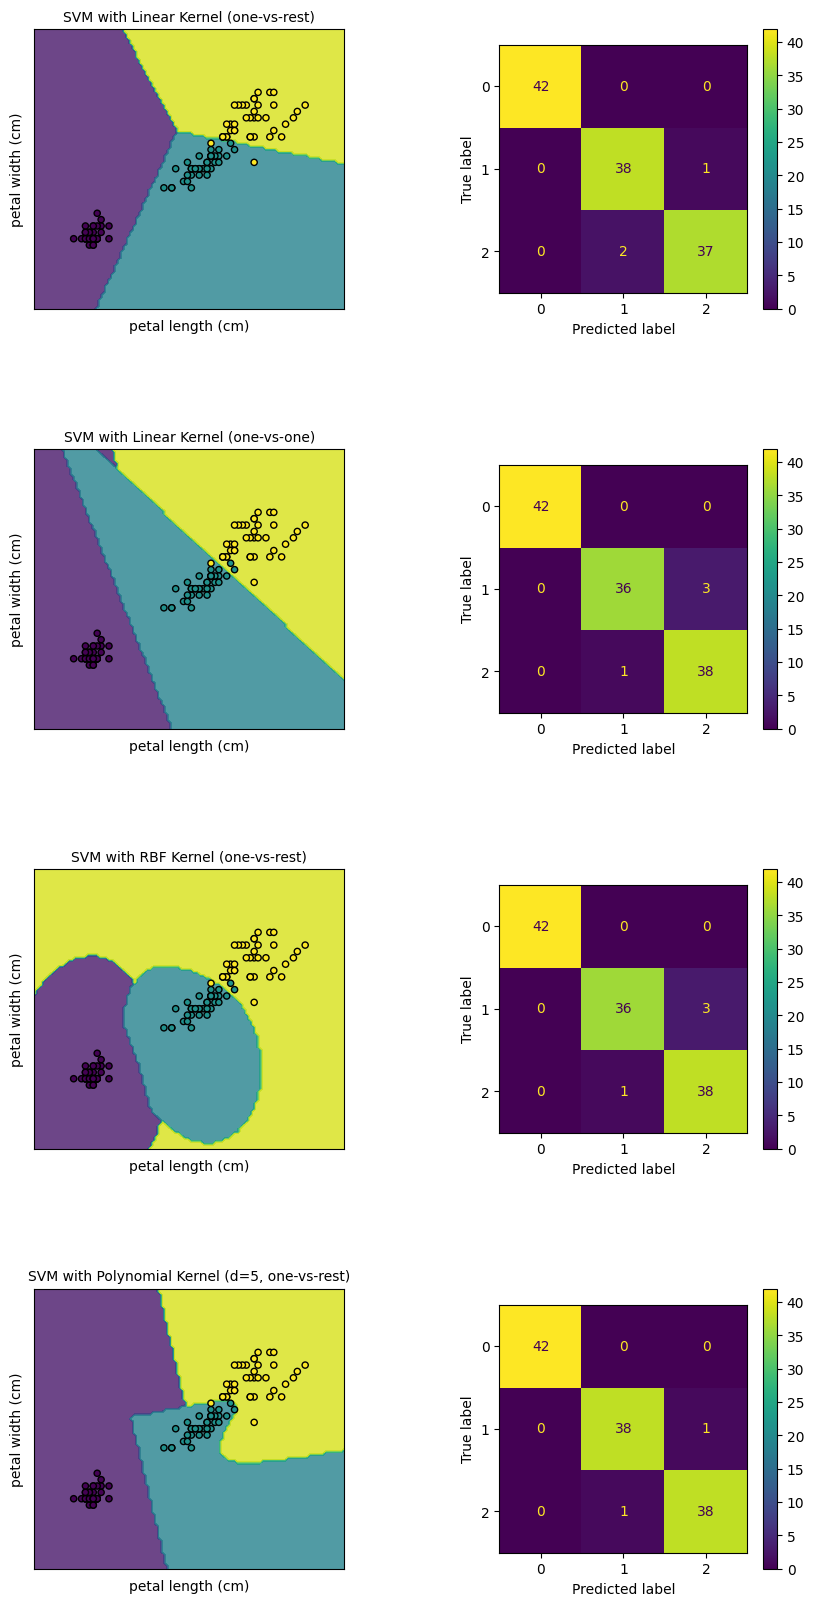

In [7]:
C = 10.0  # SVM regularization parameter
models = (
    OneVsRestClassifier(svm.SVC(kernel='linear', class_weight='balanced')),
    svm.SVC(kernel="linear", C=C, class_weight='balanced'),
    svm.SVC(kernel="rbf", gamma="auto", C=C, class_weight='balanced'),
    svm.SVC(kernel="poly", degree=5, gamma="auto", C=C, class_weight='balanced'),
)
model = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVM with Linear Kernel (one-vs-rest)",
    "SVM with Linear Kernel (one-vs-one)",
    "SVM with RBF Kernel (one-vs-rest)",
    "SVM with Polynomial Kernel (d=5, one-vs-rest)",
)

# Set-up 4x2 grid for plotting.
fig, ax = plt.subplots(4, 2, figsize=(10, 20))
plt.subplots_adjust(wspace=.5, hspace=.5)

X0, X1 = X_train[:, 0], X_train[:, 1]

for i, (clf, title) in enumerate(zip(model, titles)):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        response_method="predict",
        alpha=0.8,
        ax=ax[i, 0],
        xlabel=iris.feature_names[2],
        ylabel=iris.feature_names[3],
    )
    plot_confusion_matrix(clf, X_train, y_train, ax=ax[i, 1])
    ax[i, 0].scatter(X0, X1,c=y_train, s=20, edgecolors="k")
    ax[i, 0].set_xticks(())
    ax[i, 0].set_yticks(())
    ax[i, 0].set_title(title,fontsize=10)

plt.show()

# Model evaluation for train data

In [8]:
met = pd.DataFrame(columns=["method","accuracy","precision","recall","f1_score"])
for clf, title in zip(models,titles):
    preds = clf.predict(X_train)
    met = met.append({"method":title,
                      "accuracy":accuracy_score(y_train, preds),
                      "precision":precision_score(y_train, preds, average="macro"),
                      "recall":recall_score(y_train, preds, average="macro"),
                      "f1_score":f1_score(y_train, preds, average="macro"),
                     }, ignore_index=True)
    
met.head()

,method,accuracy,precision,recall,f1_score
0,SVM with Linear Kernel (one-vs-rest),0.975000,0.974561,0.974359,0.974355
1,SVM with Linear Kernel (one-vs-one),0.966667,0.966601,0.965812,0.965789
2,SVM with RBF Kernel (one-vs-rest),0.966667,0.966601,0.965812,0.965789
3,"SVM with Polynomial Kernel (d=5, one-vs-rest)",0.983333,0.982906,0.982906,0.982906


# Confusion matrix for test data

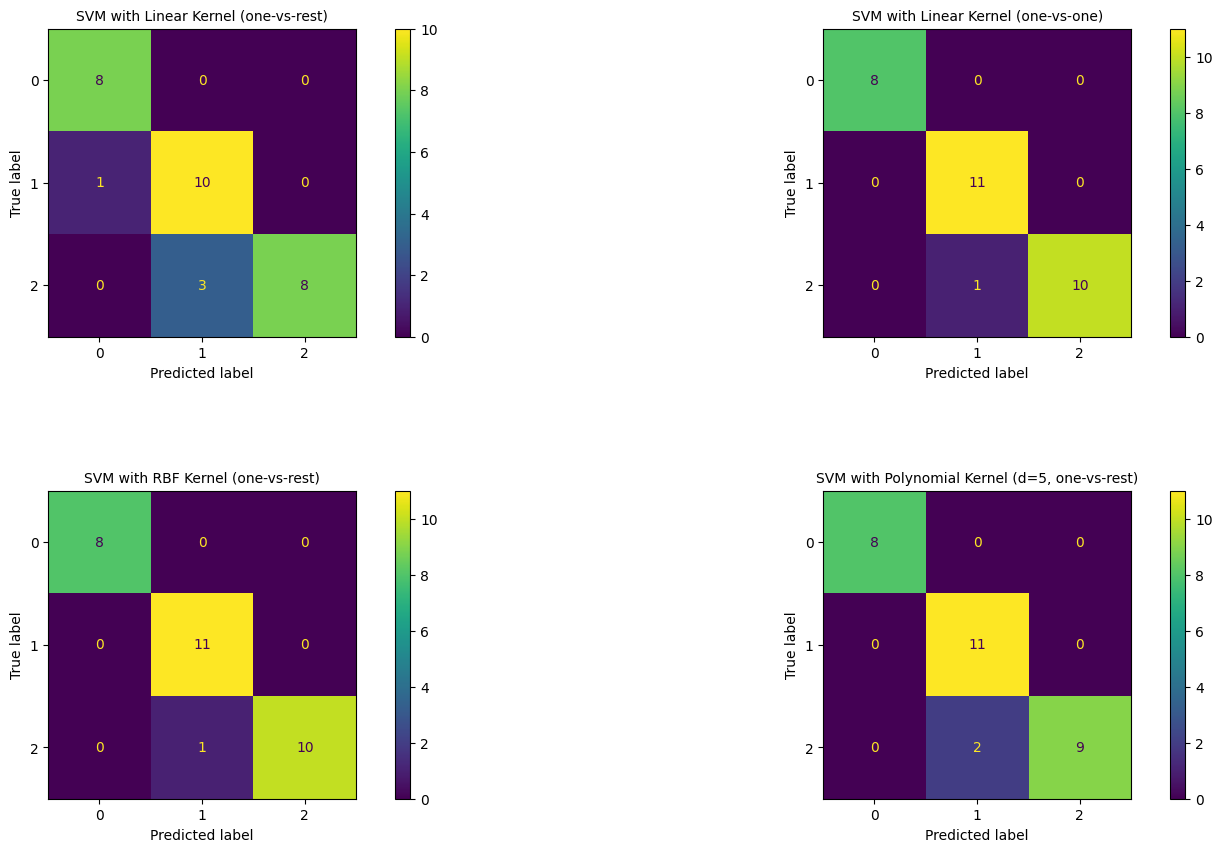

In [9]:
C = 2.0  # SVM regularization parameter
models = (
    OneVsRestClassifier(svm.SVC(kernel='linear', class_weight='balanced')),
    svm.SVC(kernel="linear", C=C, class_weight='balanced'),
    svm.SVC(kernel="rbf", gamma="auto", C=C, class_weight='balanced'),
    svm.SVC(kernel="poly", degree=5, gamma="auto", C=C, class_weight='balanced'),
)
model = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVM with Linear Kernel (one-vs-rest)",
    "SVM with Linear Kernel (one-vs-one)",
    "SVM with RBF Kernel (one-vs-rest)",
    "SVM with Polynomial Kernel (d=5, one-vs-rest)",
)

# Set-up 4x2 grid for plotting.
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
plt.subplots_adjust(wspace=0, hspace=.5)

X0, X1 = X_test[:, 0], X_test[:, 1]

for i, (clf, title,ax) in enumerate(zip(model, titles, ax.flatten())):
    plot_confusion_matrix(clf, X_test, y_test, ax=ax)
    ax.set_title(title,fontsize=10)

plt.show()

# Model evaluation for test data

In [10]:
met = pd.DataFrame(columns=["method","accuracy","precision","recall","f1_score"])
for clf, title in zip(models,titles):
    preds = clf.predict(X_test)
    met = met.append({"method":title,
                      "accuracy":accuracy_score(y_test, preds),
                      "precision":precision_score(y_test, preds, average="macro"),
                      "recall":recall_score(y_test, preds, average="macro"),
                      "f1_score":f1_score(y_test, preds, average="macro"),
                     }, ignore_index=True)
    
met.head()

,method,accuracy,precision,recall,f1_score
0,SVM with Linear Kernel (one-vs-rest),0.866667,0.886040,0.878788,0.872205
1,SVM with Linear Kernel (one-vs-one),0.966667,0.972222,0.969697,0.969634
2,SVM with RBF Kernel (one-vs-rest),0.966667,0.972222,0.969697,0.969634
3,"SVM with Polynomial Kernel (d=5, one-vs-rest)",0.933333,0.948718,0.939394,0.938889
